For a quick start guide on all plot types, please refer to
[MatplotLib Plot Types](https://matplotlib.org/stable/plot_types/index.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

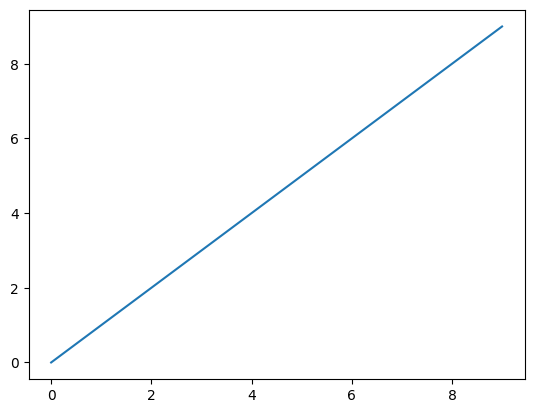

In [3]:
plt.plot(data)

## Figures and Subplots

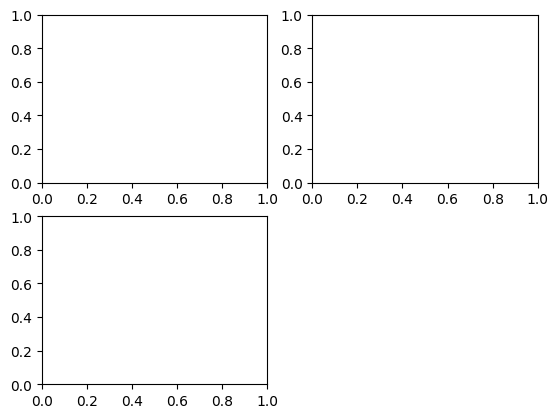

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

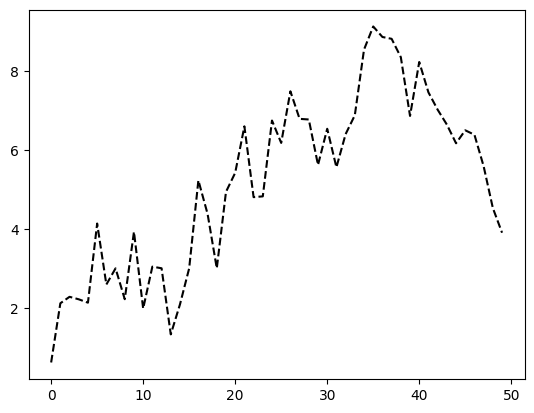

In [5]:
ax3 = plt.plot(np.random.randn(50).cumsum(), 'k--')

In [6]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

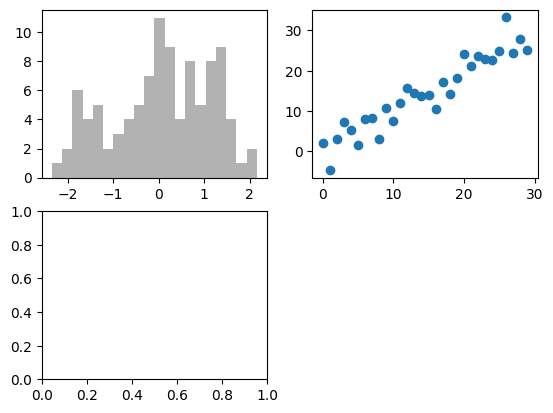

In [7]:
fig

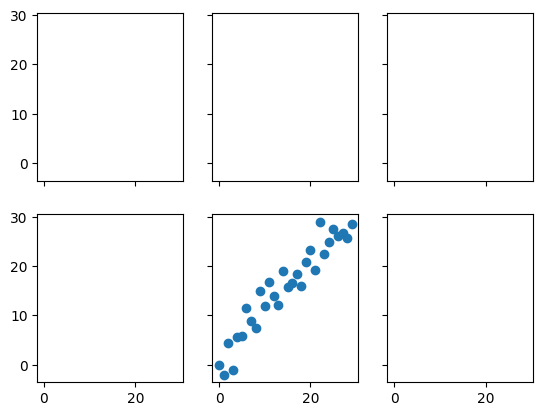

In [8]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
axes[1, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

For printing plots in better quality, it's possiible to set one of the following parameters:
```python
plt.rcParams['figure.dpi'] = 300    # for all the plots
fig.dpi = 300                       # for the current fig
```

It's also possibile to apply a rule for the **saving** quality through:
```python
plt.rcParams['savefig.dpi'] = 300
```

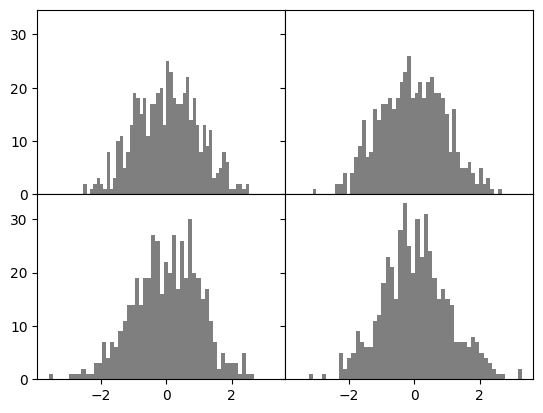

In [9]:
# Adjusting padding between figures
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
    plt.subplots_adjust(wspace=0, hspace=0)

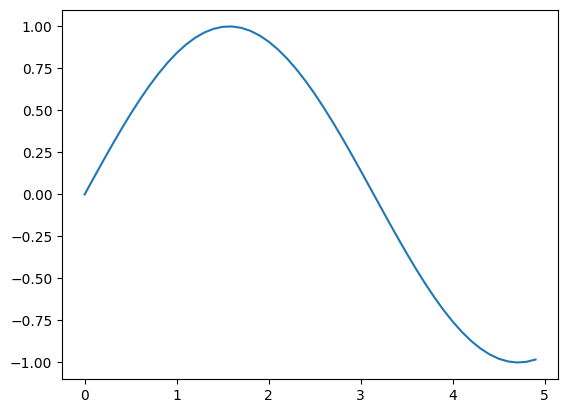

In [10]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
fig2, ax2 = plt.subplots()
ax2.plot(x, y)

It's possibile to specify the style, color and markers in one single quoted paramenter, or explicitly as follows:

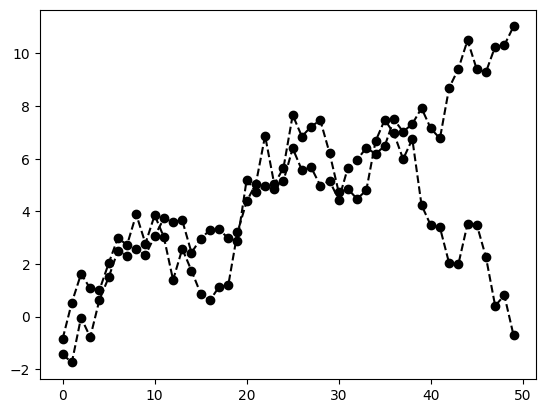

In [11]:
plt.plot(np.random.randn(50).cumsum(), color='k', linestyle='dashed', marker='o')
plt.plot(np.random.randn(50).cumsum(), 'ko--')

It's possibile to change the interpolations of the points through `drawstyle`

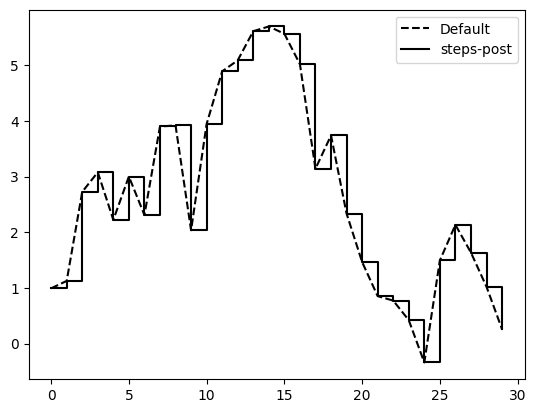

In [12]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label="Default")
plt.plot(data, 'k-', drawstyle="steps-post", label='steps-post')
plt.legend(loc='best')

## Ticks, Labels and Legends

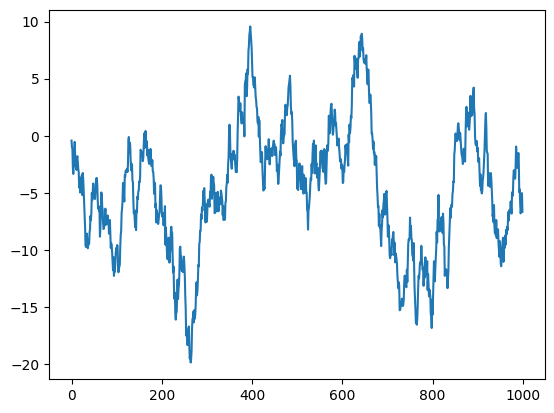

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

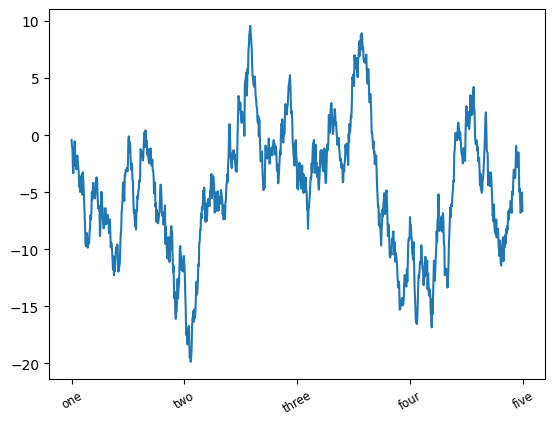

In [14]:
# Changing x-axis ticks and labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
fig

The **axes** class has a `set` method that allows batch setting of plot properties.

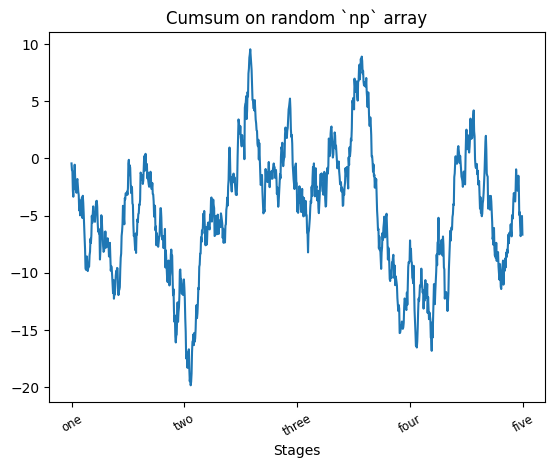

In [15]:
props = {
    'title': "Cumsum on random `np` array",
    'xlabel': 'Stages'
}

ax.set(**props)
fig

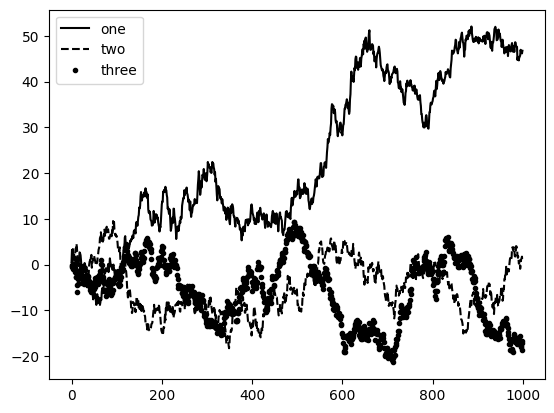

In [16]:
### Adding Legends
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

The legend method has several other choices for the location of the legend `loc` argument as:

- `best` (Axes only)  
- `upper right`       
- `upper left`        
- `lower left`        
- `lower right`       
- `right`             
- `center left`       
- `center right`      
- `lower center`      
- `upper center`      
- `center`        

It's also possibile to ignore some elements from the legend, specifying in the legend argument of a subplot `label=_nolegend_`

## Annotations and Drawing on a Subplot

In [17]:
from datetime import datetime
import pandas as pd

<Axes: xlabel='Date'>

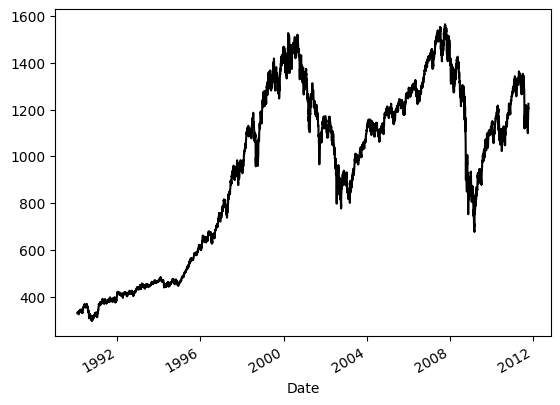

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('../../datasets/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

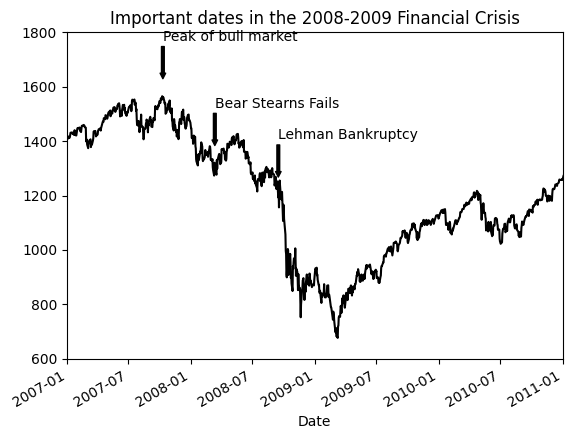

In [19]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 255),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left',verticalalignment='top')

# Zooom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 Financial Crisis')
fig

See [MatplotLib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) abount **annotations**.

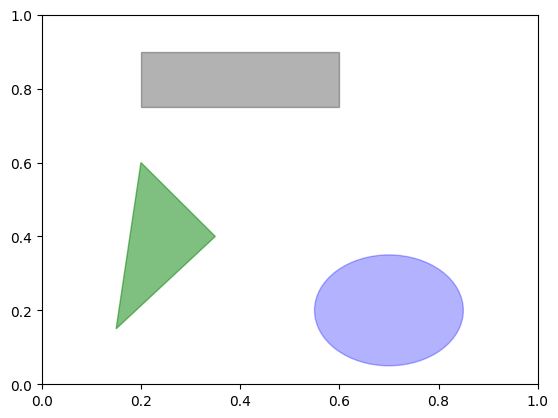

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Saving Plots to File
Using `plt.savefig(path: _str)` saves a plot to the specified file, and the format is inferred from the file extension. Important arguments are:
- **dpi**
- **bbox_inches**: can trim the whitespace around the actual figure
- **facecolor, edgecolor**: color of the figure BG outside subplots
- **format**: explicit format declaration

## matplotlib Configuration

In [21]:
plt.rc('figure', figsize=(10, 10))

font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 10
}

plt.rc('font', **font_options)


## Plotting with Seaborn and Pandas

<Axes: >

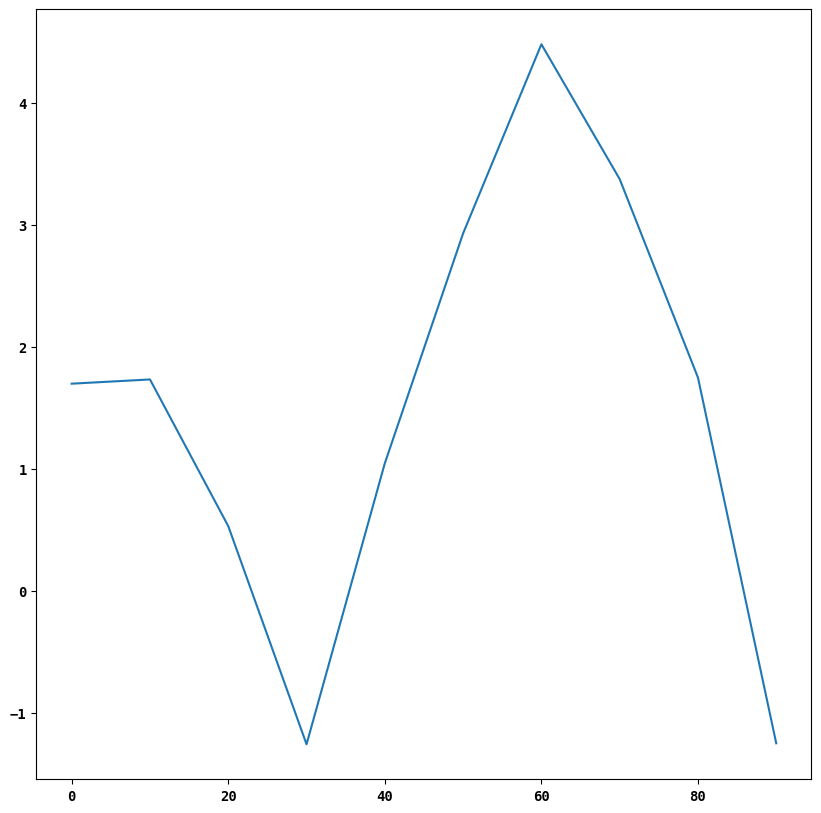

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

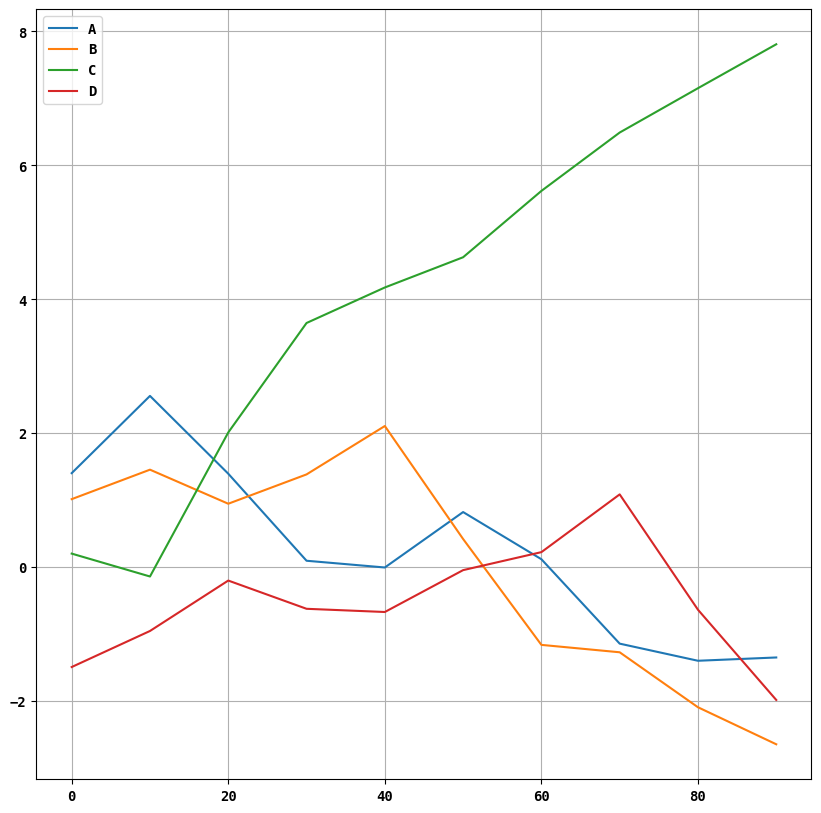

In [23]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

ax = df.plot(grid=True)
ax.legend(loc='best')

Many options are available in the pandas plot method: it's also possible to pass reference to matplotlib objects as subplots or axes for better handling multiple data visualization.

A list of `Series.plot()` method arugments:

- `label`
- `ax`: matlplotlib subplot object to plot on
- `style`: style string like `"k0--"`
- `alpha`
- `kind`: can be: `'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'`
- `logy`: use log scale on the y-axis
- `use_index`: use obj index for tick labels
- `rot`: rotation of ticks' labels
- `xticks`
- `yticks`
- `xlim`
- `ylim`
- `grid`: display axis grid (`False` by default)

For `Dataframes`, there are additional options:
- `sublpots`: plot each dataframe column on a separate subplot
- `sharex`: if only `subplots=True`
- `sharey`: if only `subplots=True`
- `figsize`: tuple of dimensions
- `title`
- `legend`
- `sort_columns`: plot cols in alphabetical order; by default using existing order

### Bar Plots

<Axes: >

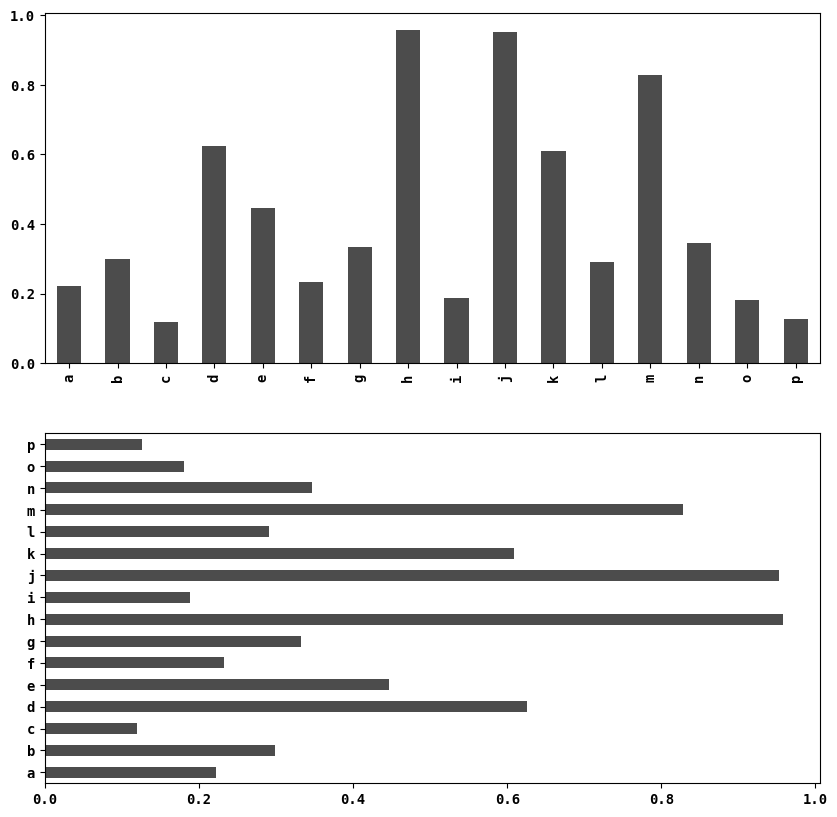

In [24]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [25]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.921957,0.329267,0.157854,0.337671
two,0.107397,0.830303,0.906094,0.499893
three,0.299036,0.886300,0.418071,0.892280
four,0.070037,0.818440,0.975532,0.798324
five,0.933060,0.419324,0.689042,0.917360
six,0.478318,0.311220,0.387547,0.509822


<Axes: >

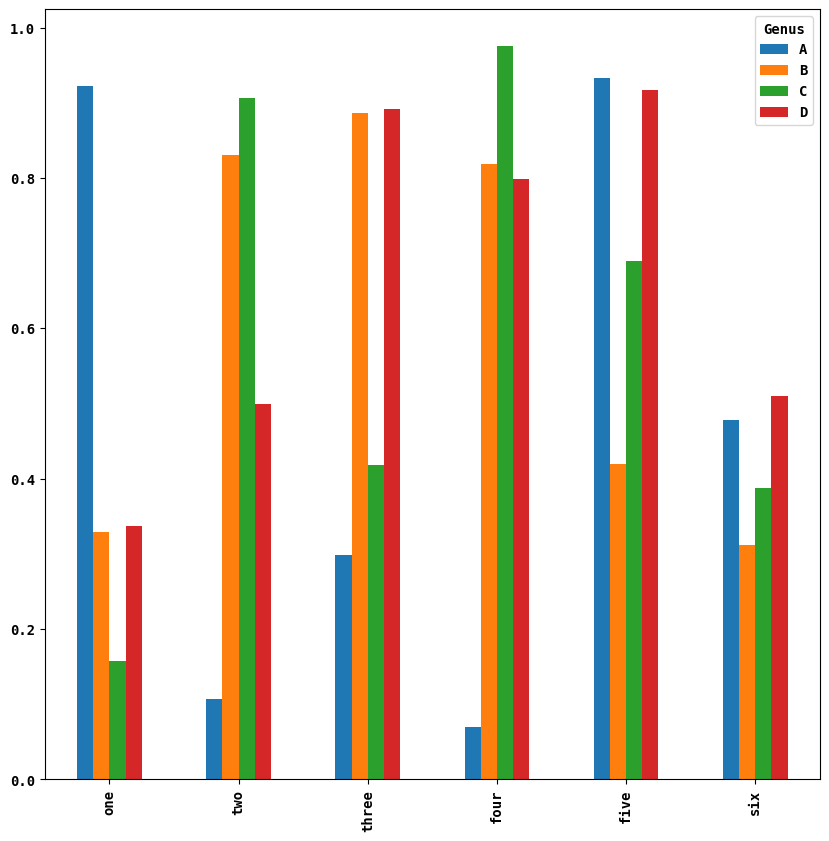

In [26]:
df.plot.bar()

<Axes: >

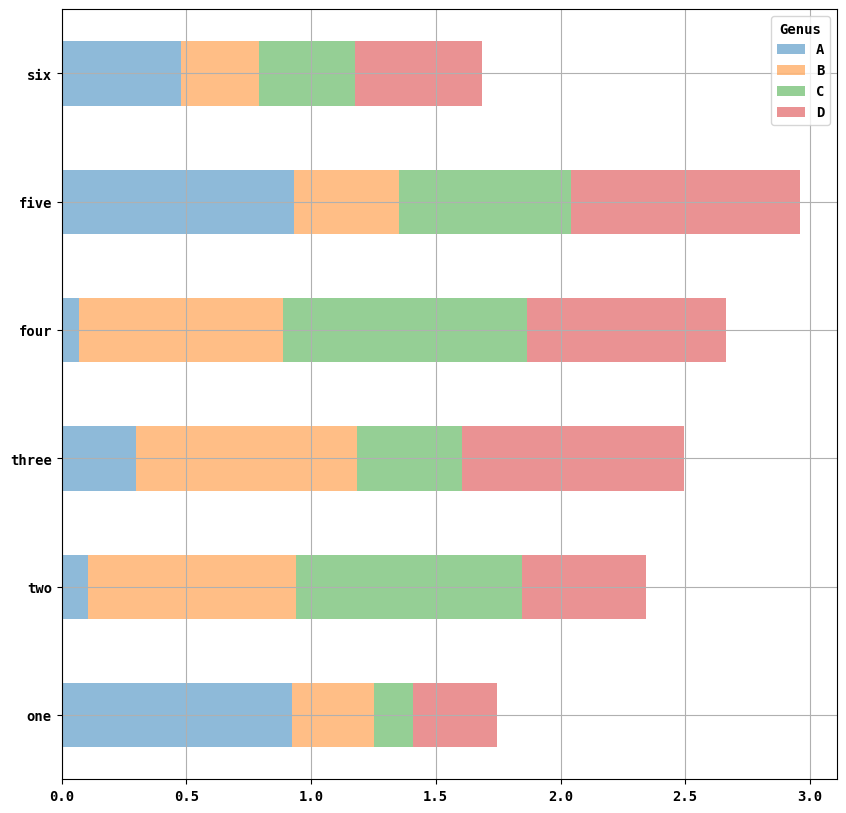

In [27]:
df.plot.barh(stacked=True, alpha=0.5, grid=True)

In [28]:
tips = pd.read_csv("../../datasets/tips.csv")
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [29]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [30]:
party_counts = party_counts.loc[:, 2:5]

In [31]:
# Normalizing to sum 1 foreach row
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<Axes: xlabel='day'>

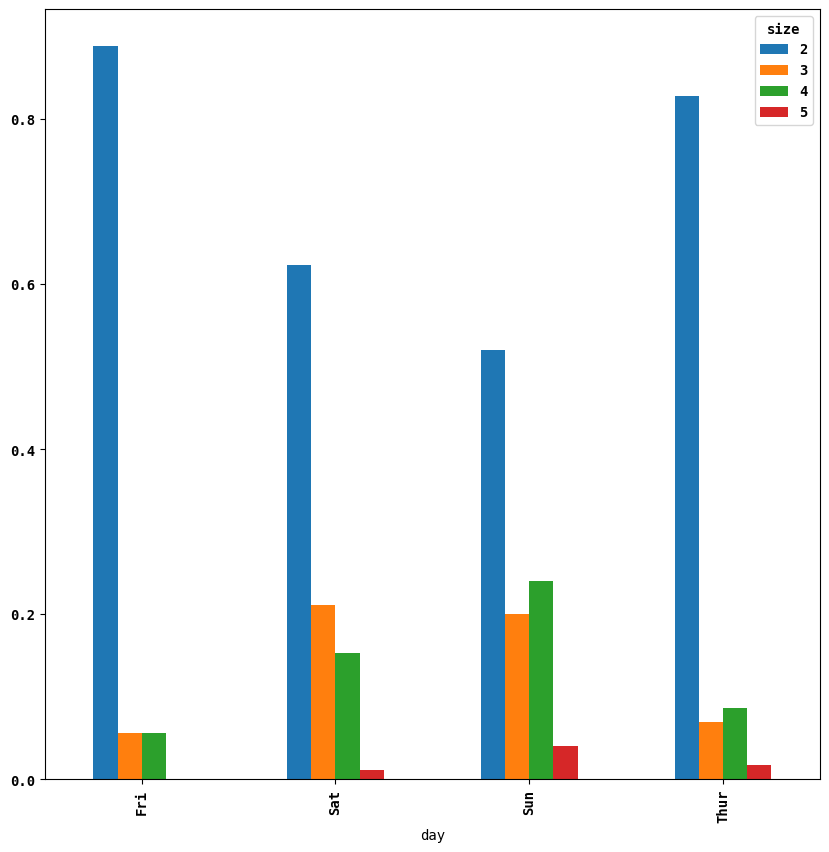

In [32]:
party_pcts.plot.bar()

`seaborn` can be use with data that requires aggregation or summarization before making a plot.

In [33]:
# showing percentage by day
import seaborn as sns

In [34]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

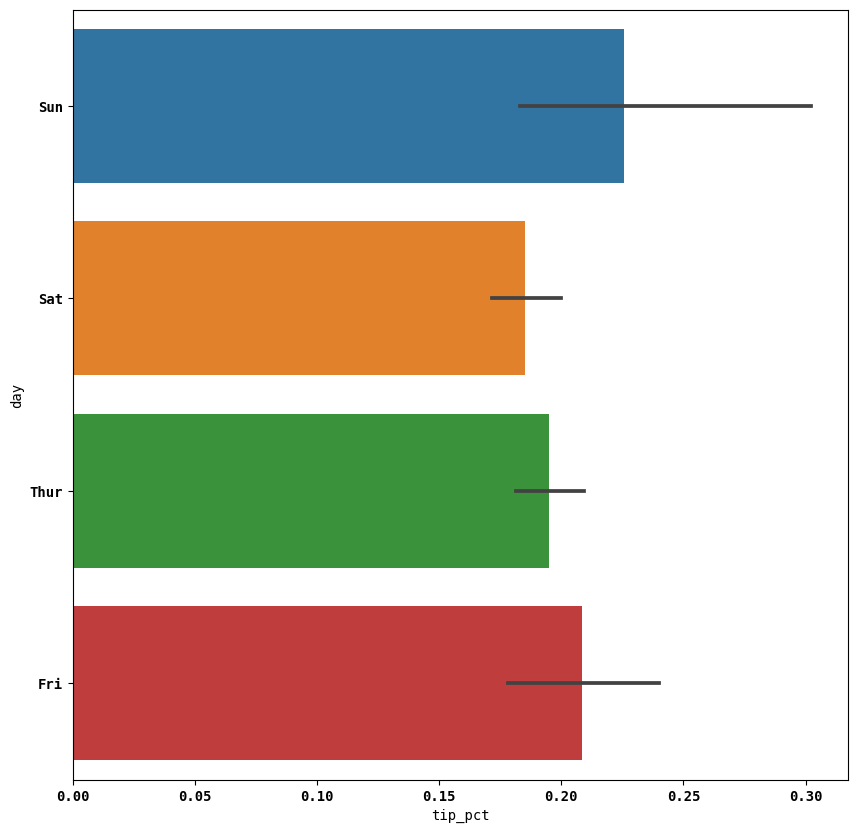

In [35]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Black bars represent the possibile error commmited when calculating (95% confidence interval).

<Axes: xlabel='tip_pct', ylabel='day'>

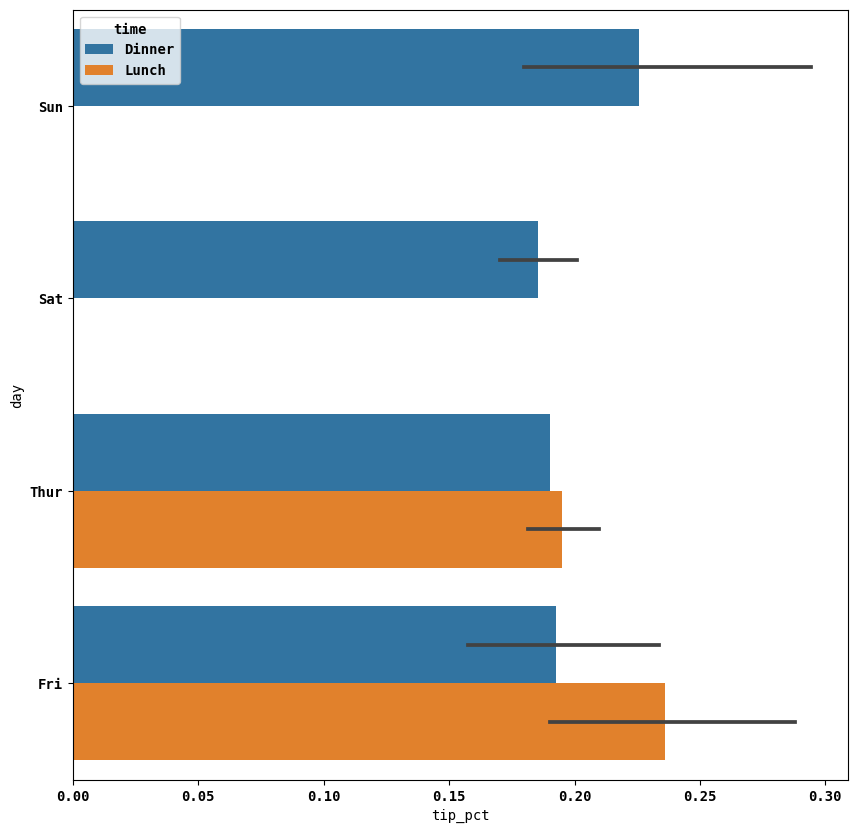

In [36]:
# With the hue argument, it's possibile to split by an 
# additional categorical value

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Hisograms and Density Plots

Kind of a bar plot that gives a discretized display of a value frequencey.
The data points are split into discrete, evenly spaced **bins**, and the number of data points in each bin is plotted.

<Axes: ylabel='Frequency'>

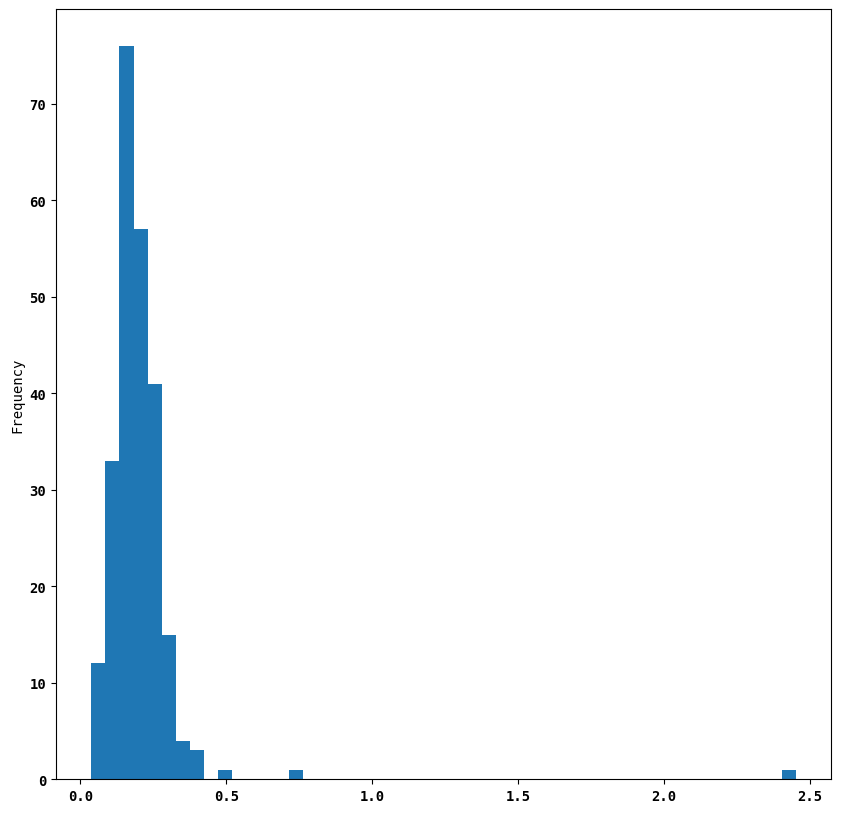

In [37]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a **density plot**, which is formed by computing an estimate of a continuous probability distribution that migh have generated the observed data. The usual procedure is to approximate this distribution as a mixture of 'kernels' - that is simpler distributions like the normal distribution.
This, density plots are also known as Kernel Density Estimate (KDE) plots.

Using `plot.kde` makes a density plot using the conventional mixutre of normals estimate.

Note: in order to use `plot.density()` or `plot.kde()`, it's necessary to have `scipy` installed on the sysstem! 

<Axes: ylabel='Density'>

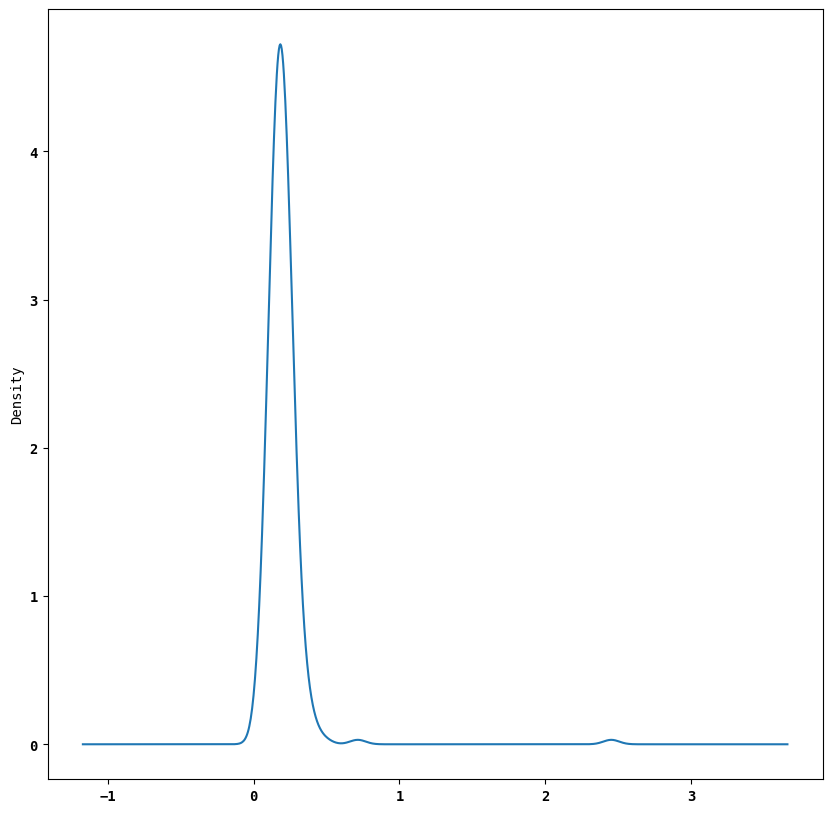

In [38]:
tips['tip_pct'].plot.density()

The book suggests using `distplot` displaying histogram with normal distribution interpolation, but since this function has been deprecated in seaborn version 0.11, the adapted function call will be `displot(..., kde=True)`:
without the `kde` argument, `displot` is under the hood an `histplot`

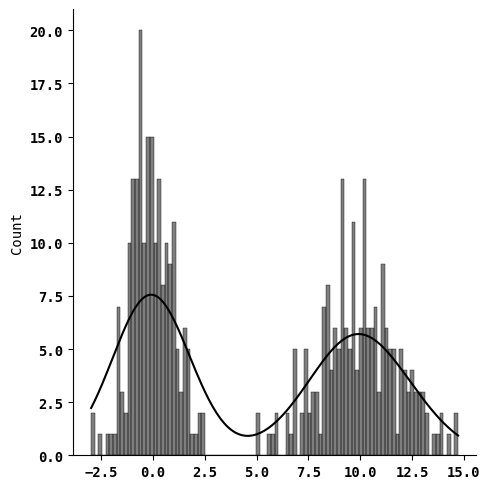

In [39]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.displot(values, bins=100, color='k', kde=True)


### Scatter of Point Plots

In [40]:
macro = pd.read_csv('../../datasets/macrodata.csv')

In [41]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [42]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [43]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

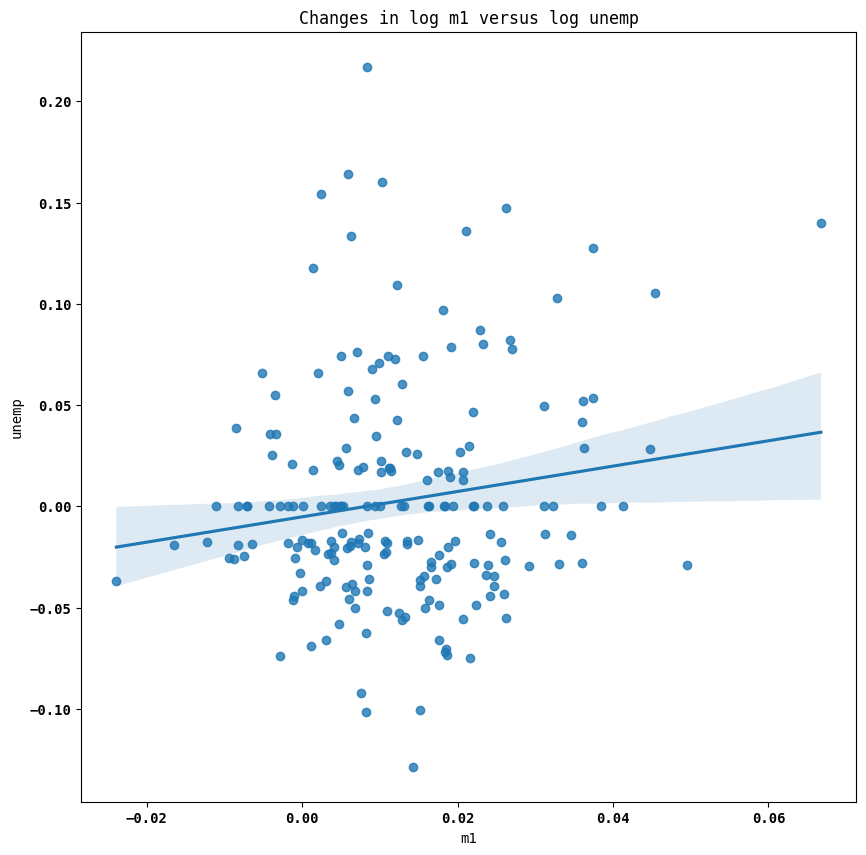

In [44]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory Data Analysis, it's helpful to be able to look at all the scatter plots among a group of variables.

With `pairplot`, it's an easy task, and it's support placing histograms or density esitmates of each variable along the diagonal.

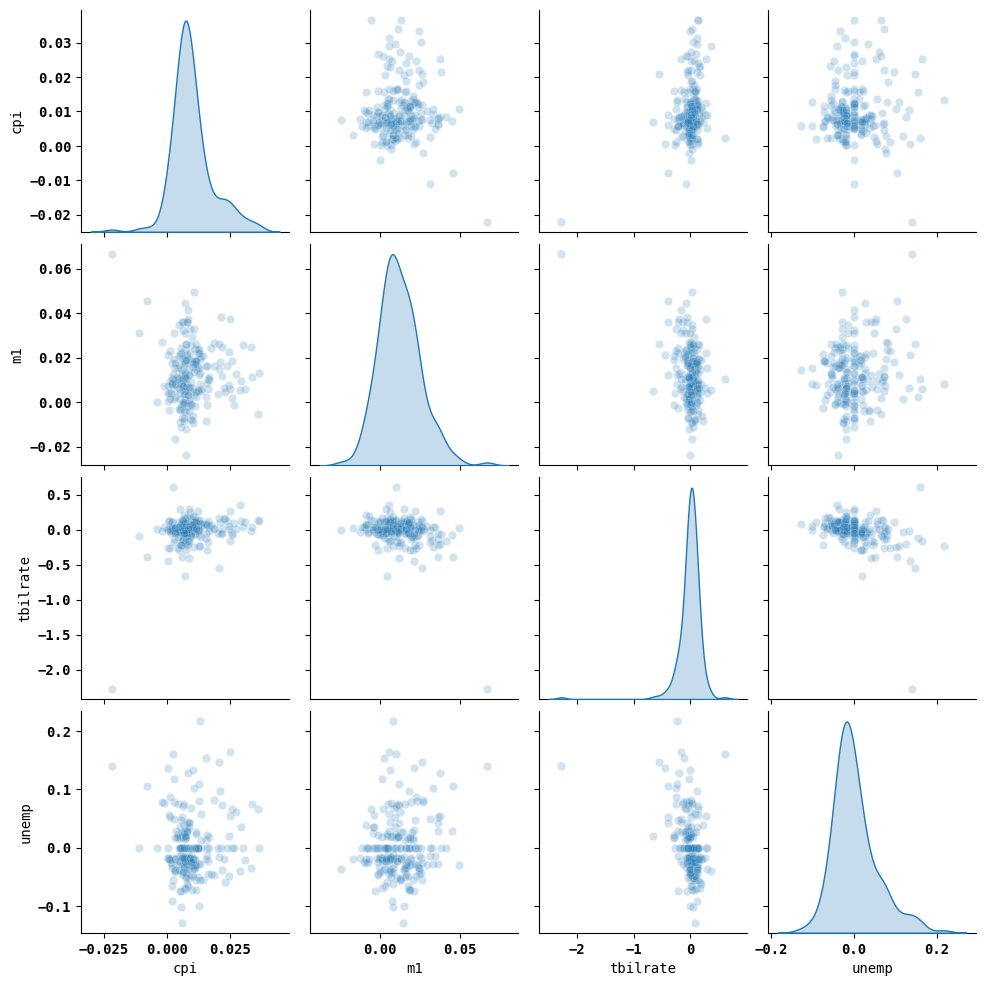

In [45]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

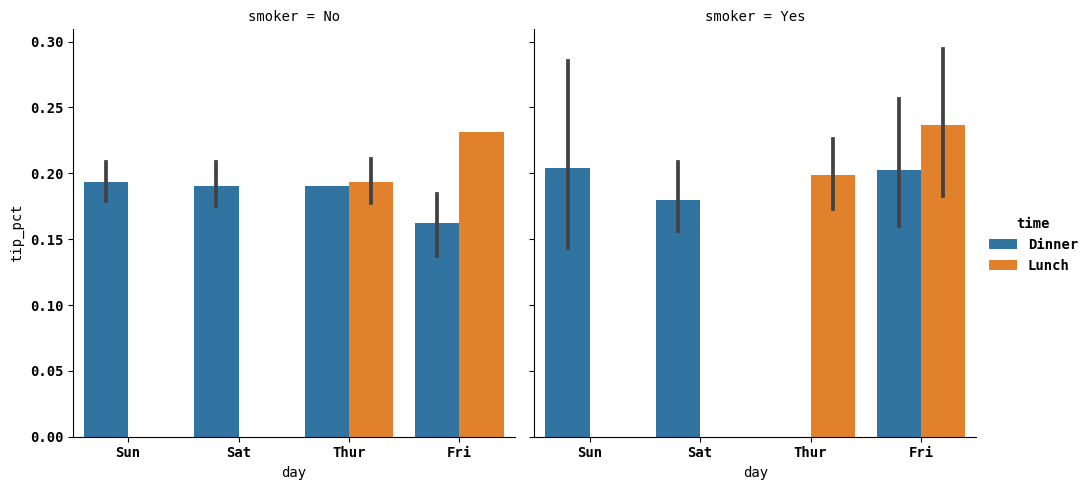

In [47]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

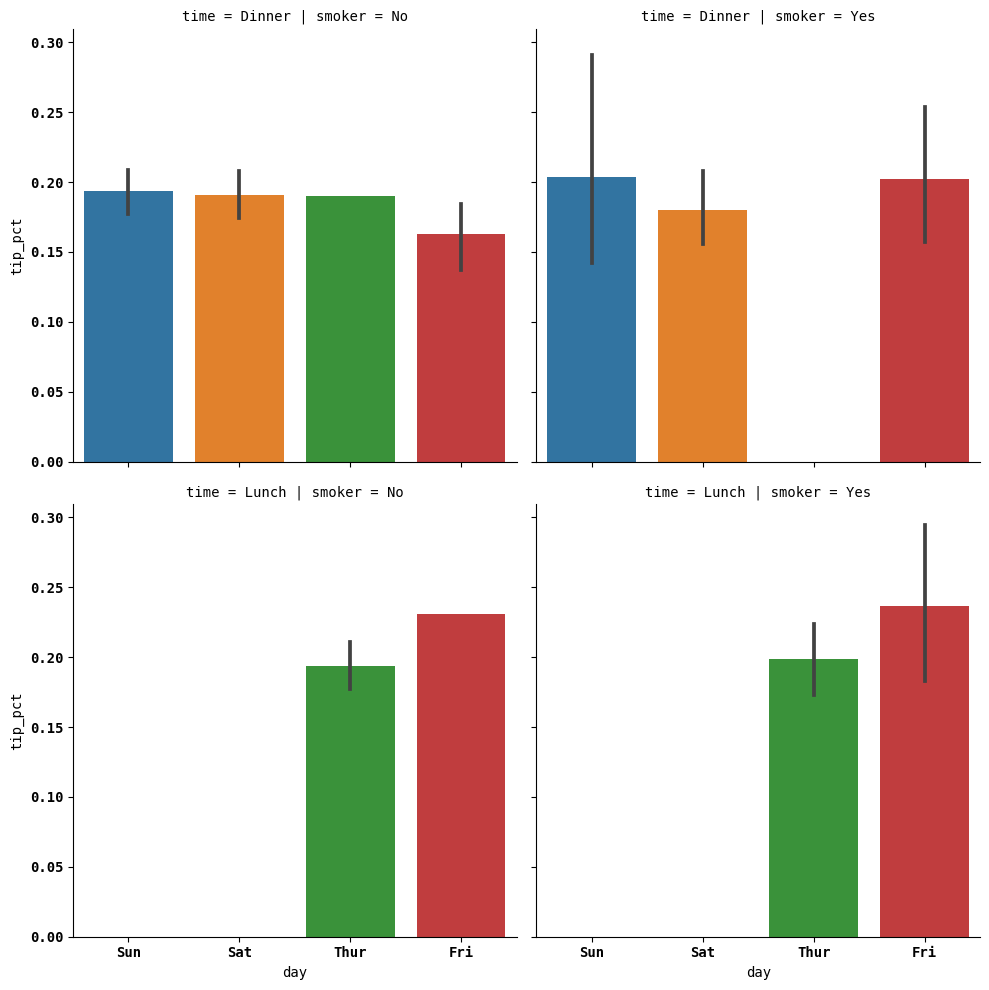

In [49]:
sns.catplot(x='day', y='tip_pct', row='time',
            col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

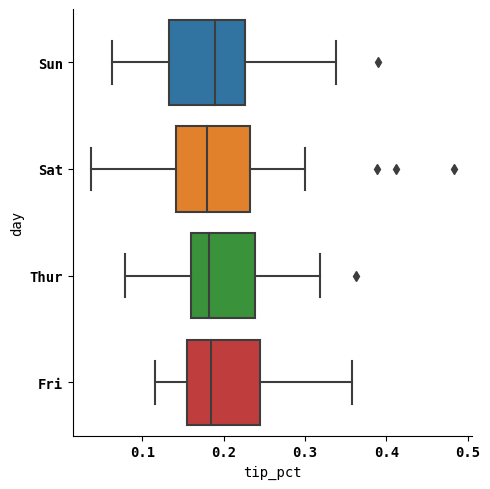

In [50]:
# With box plots it's possible to show
# - median
# - quartiles
# - outliers
sns.catplot(x='tip_pct', y='day', kind='box',
            data=tips[tips.tip_pct < 0.5])